# Del 03: Web Communication and Web Scraping

## Web Scraping

**Viri**:
- [Building a Web Scraper from start to finish](https://hackernoon.com/building-a-web-scraper-from-start-to-finish-bb6b95388184)
- [Introduction to Web Scraping with BeautifulSoup](https://towardsdatascience.com/introduction-to-web-scraping-with-beautifulsoup-e87a06c2b857)
- [Web Scraping using Selenium and BeautifulSoup](https://towardsdatascience.com/web-scraping-using-selenium-and-beautifulsoup-99195cd70a58)
- [Web scraping with Python — A to Z](https://towardsdatascience.com/web-scraping-with-python-a-to-copy-z-277a445d64c7)
- [Web scraping for web developers: a concise summary](https://medium.freecodecamp.org/web-scraping-for-web-developers-a-concise-summary-3af3d0ca4069)
- [Web Scraping Walkthrough with Python](https://dev.to/awwsmm/web-scraping-walkthrough-with-python-85c)
- [Web Scraping Using BeautifulSoup](https://towardsdatascience.com/web-scraping-using-beautifulsoup-edd9441ba734)
- [Web Scraping Mountain Weather Forecasts using Python and a Raspberry Pi](https://towardsdatascience.com/web-scraping-mountain-weather-forecasts-using-python-and-a-raspberry-pi-f215fdf82c6b)
- [Data Science Skills: Web scraping using python](https://towardsdatascience.com/data-science-skills-web-scraping-using-python-d1a85ef607ed)


## What Is Web Scraping?

In [1]:
import pandas as pd

Web “scraping” (also called “web harvesting,” “web data extraction,” or even “web data
mining”), can be defined as “the construction of an agent to download, parse, and
organize data from the web in an automated manner.” Or, in other words: instead of
a human end user clicking away in a web browser and copy-pasting interesting parts
into, say, a spreadsheet, web scraping offloads this task to a computer program that can
execute it much faster, and more correctly, than a human can.

<img class="progressiveMedia-image js-progressiveMedia-image" data-src="https://cdn-images-1.medium.com/max/1600/1*GOyqaID2x1N5lD_rhTDKVQ.png" src="https://cdn-images-1.medium.com/max/1600/1*GOyqaID2x1N5lD_rhTDKVQ.png">

### Why Web Scraping for Data Science?

When surfing the web using a normal web browser, you’ve probably encountered
multiple sites where you considered the possibility of gathering, storing, and analyzing
the data presented on the site’s pages. Especially for data scientists, whose “raw
material” is data, the web exposes a lot of interesting opportunities:
- There might be an interesting table on a Wikipedia page (or pages) you want to retrieve to perform some statistical analysis.
- Perhaps you want to get a list of reviews from a movie site to perform text mining, create a recommendation engine, or build a predictive model to spot fake reviews.
- You might wish to get a listing of properties on a real-estate site to build an appealing geo-visualization.
- You’d like to gather additional features to enrich your data set based on information found on the web, say, weather information to forecast, for example, soft drink sales.
- You might be wondering about doing social network analytics using profile data found on a web forum.
- It might be interesting to monitor a news site for trending new stories on a particular topic of interest.

The web contains lots of interesting data sources that provide a treasure trove for all
sorts of interesting things. Sadly, the current unstructured nature of the web does not
always make it easy to gather or export this data in an easy manner. Web browsers are
very good at showing images, displaying animations, and laying out websites in a way
that is visually appealing to humans, but they do not expose a simple way to export their
data, at least not in most cases. Instead of viewing the web page by page through your
web browser’s window, wouldn’t it be nice to be able to automatically gather a rich data
set? This is exactly where web scraping enters the picture.



## Network complexity

Nowadays, the web has become so integrated into our day-to-day activities that we
rarely consider its complexity. Whenever you surf the web, a whole series of networking
protocols is being kicked into gear to set up connections to computers all over the world
and retrieve data, all in a matter of seconds. Consider, for instance, the following series
of steps that gets executed by your web browser once you navigate to a website.

## HTTP

We’ve now seen how your web browser communicates with a server on the World
Wide Web. The core component in the exchange of messages consists of a HyperText
Transfer Protocol (HTTP) request message to a web server, followed by an HTTP
response (also oftentimes called an HTTP reply), which can be rendered by the browser.

Since all of our web scraping will build upon HTTP, we do need to take a closer look at
HTTP messages to learn what they look like.

HTTP is, in fact, a rather simple networking protocol. It is text based, which at
least makes its messages somewhat readable to end users (compared to raw binary
messages that have no textual structure at all) and follow a simple request-reply
based communication scheme. That is, contacting a web server and receiving a reply
simply involves two HTTP messages: a request and a reply. In case your browser wants
to download or fetch additional resources (such as images), this will simply entail
additional request-reply messages being sent.

## HTML and CSS

So far we have discussed the basics of HTTP and how you can perform HTTP requests
in Python using the requests library. However, since most web pages are formatted
using the Hypertext Markup Language (HTML), we need to understand how to extract
information from such pages. As such, this chapter introduces you to HTML, as well
as another core building block that is used to format and stylize modern web pages:
Cascading Style Sheets (CSS). This chapter then discusses the Beautiful Soup library,
which will help us to make sense of the HTML and CSS “soup.”

<img class="progressiveMedia-image js-progressiveMedia-image" data-src="https://cdn-images-1.medium.com/max/1600/1*x9mxFBXnLU05iPy19dGj7g.png" src="https://cdn-images-1.medium.com/max/1600/1*x9mxFBXnLU05iPy19dGj7g.png">

### Hypertext Markup Language: HTML

In the previous chapter, we introduced the basics of HTTP and saw how to perform
HTTP requests in Python using the requests library, but now we need to figure out a
way to parse HTML contents. Recall our small Wikipedia example we ended with in the
previous chapter and the soup of HTML we got back from it:

Link strani: https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687

In [34]:
import requests
# url_got = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
url_got = 'https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes'
r = requests.get(url_got)

If you run the example above, you’ll see the following being printed onscreen:

In [13]:
#print(r.text)

This is Hypertext Markup Language (HTML), the standard markup language for
creating web pages. Although some will call HTML a “programming language,” “markup
language” is a more appropriate term as it specifies how a document is structured and
formatted. There is no strict need to use HTML to format web pages — in fact, all the
examples we’ve dealt with in the previous chapter just returned simple, textual pages.
However, if you want to create visually appealing pages that actually look good in a
browser (even if it’s just putting some color on a page), HTML is the way to go.

HTML provides the building blocks to provide structure and formatting to
documents. This is provided by means of a series of “tags.” HTML tags often come in
pairs and are enclosed in angled brackets, with `<tagname>` being the opening tag and
`</tagname>` indicating the closing tag. Some tags come in an unpaired form, and do
not require a closing tag. Some commonly used tags are the following:

- `<p>...</p>` to enclose a paragraph;
- `<br>` to set a line break;
- `<table>...</table>` to start a table block, inside; `<tr>...<tr/>` is used for the rows; and `<td>...</td>` cells;
- `<img>` for images;
- `<h1>...</h1> to <h6>...</h6>` for headers;
- `<div>...</div>` to indicate a “division” in an HTML document, basically used to group a set of elements;
- `<a>...</a>` for hyperlinks;
- `<ul>...</ul>, <ol>...</ol>` for unordered and ordered lists respectively; inside of these, `<li>...</li>` is used for each list item.

## Using Your Browser as a Development Tool

Most modern web browsers nowadays include a toolkit of powerful tools you can
use to get an idea of what’s going on regarding HTML, and HTTP too. Navigate to the
Wikipedia page over at https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687 again in your browser — we assume
you’re using Google Chrome for what follows. First of all, it is helpful to know how you
can take a look at the underlying HTML of this page. To do so, you can right-click on the
page and press `View source` or simply press Control+U in Google Chrome. A new page
will open containing the raw HTML contents for the current page (the same content as
what we got back using r.text)

Additionally, you can open up Chrome’s “Developer Tools.” To do so, either select the
Chrome Menu at the top right of your browser window, then select “Tools,” “Developer
Tools,” or press Control+Shift+I. Alternatively, you can also right-click on any page
element and select `Inspect Element`. Other browsers such as Firefox and Microsoft
Edge have similar tools built in.

## The Beautiful Soup Library

We’re now ready to start working with HTML pages using Python. Recall the following
lines of code:

In [37]:
import requests
#url_got = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
r = requests.get(url_got)

In [38]:
html_contents = r.text

> **[beautifulsoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**: Beautiful Soup tries to organize complexity: it helps to parse, structure and organize the oftentimes very messy web by fixing bad HTML and presenting us with an easy-to-work-with Python structure.

Using Beautiful Soup starts with the creation of a BeautifulSoup object. If you
already have an HTML page contained in a string (as we have), this is straightforward.
Don’t forget to add the new import line:

In [39]:
from bs4 import BeautifulSoup

In [40]:
html_soup = BeautifulSoup(html_contents)

The Beautiful Soup library itself depends on an HTML
parser to perform most of the bulk parsing work.

In Python, multiple parsers exist to do so:
- `html.parser`: a built-in Python parser that is decent (especially when using recent versions of Python 3) and requires no extra installation.
- `lxml`: which is very fast but requires an extra installation.
- `html5lib`: which aims to parse web page in exactly the same way as a web browser does, but is a bit slower.

Since there are small differences between these parsers, Beautiful Soup warns you if
you don’t explicitly provide one, this might cause your code to behave slightly different
when executing the same script on different machines. To solve this, we simply specify a
parser ourselves — we’ll stick with the default Python parser here:

In [41]:
html_soup = BeautifulSoup(html_contents, 'html.parser')

Beautiful Soup’s main task is to take HTML content and transform it into a tree-based representation. Once you’ve created a BeautifulSoup object, there are two
methods you’ll be using to fetch data from the page:
- `find(name, attrs, recursive, string, **keywords)`
- `find_all(name, attrs, recursive, string, limit, **keywords)`

Both methods look very similar indeed, with the exception that find_all takes an
extra limit argument. To test these methods, add the following lines to your script and
run it:

In [42]:
print(html_soup.find('h1'))

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>


In [43]:
print(html_soup.find('', {'id': 'p-logo'}))

<div id="p-logo" role="banner">
<a class="mw-wiki-logo" href="/wiki/Main_Page" title="Visit the main page"></a>
</div>


In [44]:
for found in html_soup.find_all(['h1', 'h2']):
    print(found)

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>
<h2 id="mw-toc-heading">Contents</h2>
<h2><span class="mw-headline" id="Series_overview">Series overview</span></h2>
<h2><span class="mw-headline" id="Episodes">Episodes</span></h2>
<h2><span class="mw-headline" id="Home_media_releases">Home media releases</span></h2>
<h2><span class="mw-headline" id="Ratings">Ratings</span></h2>
<h2><span class="mw-headline" id="References">References</span></h2>
<h2><span class="mw-headline" id="External_links">External links</span></h2>
<h2>Navigation menu</h2>


The general idea behind these two methods should be relatively clear: they’re used
to find elements inside the HTML tree. Let’s discuss the arguments of these two methods
step by step:
- The `name` argument defines the tag names you wish to “find” on the page. You can pass a string, or a list of tags. Leaving this argument as an empty string simply selects all elements.
- The `attrs` argument takes a Python dictionary of attributes and matches HTML elements that match those attributes.
- The `recursive` argument is a Boolean and governs the depth of the search. If set to True - the default value, the find and find_all methods will look into children, children’s children, and so on... for elements that match your query. If it is False, it will only look at direct child elements.
- The `string` argument is used to perform matching based on the text content of elements.
- The `limit` argument is only used in the find_all method and can be used to limit the number of elements that are retrieved. Note that find is functionally equivalent to calling find_all with the limit set to 1, with the exception that the former returns the retrieved element directly, and that the latter will always return a list of items, even if it just contains a single element. Also important to know is that, when find_all cannot find anything, it returns an empty list, whereas if find cannot find anything, it returns None.

Both find and find_all return Tag objects.

In [45]:
# Find the first h1 tag
first_h1 = html_soup.find('h1')

In [46]:
first_h1

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>

Access the name attribute to retrieve the tag name.

In [47]:
first_h1.name

'h1'

Access the contents attribute to get a Python list containing the tag’s
children (its direct descendant tags) as a list.

In [48]:
first_h1.contents

['List of ', <i>Game of Thrones</i>, ' episodes']

Converting the Tag object to a string shows both the tag and its HTML
content as a string. This is what happens if you call print out the Tag
object, for instance, or wrap such an object in the str function.

In [49]:
print(str(first_h1))

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>


Use the text attribute to get the contents of the Tag object as clear
text (without HTML tags).

In [50]:
first_h1.text

'List of Game of Thrones episodes'

Alternatively, you can use the get_text method as well, to which a
strip Boolean argument can be given so that get_text(strip=True)
is equivalent to text.strip(). It’s also possible to specify a string to
be used to join the bits of text enclosed in the element together, for
example, get_text('--').



In [51]:
first_h1.get_text()

'List of Game of Thrones episodes'

In [52]:
first_h1.attrs

{'id': 'firstHeading', 'class': ['firstHeading'], 'lang': 'en'}

In [53]:
first_h1.attrs['id']

'firstHeading'

In [54]:
first_h1['id']     # Does the same

'firstHeading'

In [55]:
first_h1.get('id')   # Does the same

'firstHeading'

> First of all, you cannot use class as a keyword, as this is a reserved
Python keyword. This is a pity, as this will be one of the most frequently used
attributes when hunting for content inside HTML. Luckily, Beautiful Soup has
provided a workaround. Instead of using class, just write class_ as follows:
“find(class_='myclass')”.

In [56]:
# Find the first four cite elements with a citation class
cites = html_soup.find_all('cite', class_='citation', limit=4)

In [57]:
#cites

In [58]:
for citation in cites:
    print("-->", citation.get_text())
    # Inside of this cite element, find the first a tag
    link = citation.find('a')
    # ... and show its URL
    print(link.get('href'))
    print()

--> Fowler, Matt (April 8, 2011). "Game of Thrones: "Winter is Coming" Review". IGN. Archived from the original on August 17, 2012. Retrieved September 22, 2016.
https://web.archive.org/web/20120817073932/http://tv.ign.com/articles/116/1160215p1.html

--> Fleming, Michael (January 16, 2007). "HBO turns Fire into fantasy series". Variety. Archived from the original on May 16, 2012. Retrieved September 3, 2016.
https://web.archive.org/web/20120516224747/http://www.variety.com/article/VR1117957532?refCatId=14

--> "Game of Thrones". Emmys.com. Retrieved September 17, 2016.
http://www.emmys.com/shows/game-thrones

--> Roberts, Josh (April 1, 2012). "Where HBO's hit 'Game of Thrones' was filmed". USA Today. Archived from the original on April 1, 2012. Retrieved March 8, 2013.
https://web.archive.org/web/20120401123724/http://travel.usatoday.com/destinations/story/2012-04-01/Where-the-HBO-hit-Game-of-Thrones-was-filmed/53876876/1



Let us now try to work out the following use case. You’ll note that our Game of
Thrones Wikipedia page has a number of well-maintained tables listing the episodes with their directors, writers, air date, and number of viewers. Let’s try to fetch all of this
data at once using what we have learned: 

In [2]:
import requests
from bs4 import BeautifulSoup
# url = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
url = 'https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes'
r = requests.get(url)

In [3]:
html_contents = r.text

In [4]:
html_soup = BeautifulSoup(html_contents, 'html.parser')

In [5]:
# We'll use a list to store our episode list
episodes = []

Vidimo da je vsem tabelam skupen element class:'wikiepisodetable'

In [6]:
ep_tables = html_soup.find_all('table', class_='wikiepisodetable')

In [7]:
len(ep_tables)

9

In [8]:
for table in ep_tables:
    headers = []
    rows = table.find_all('tr')
    # Start by fetching the header cells from the first row to determine
    # the field names
    for header in table.find('tr').find_all('th'):
        headers.append(header.text)
    # Then go through all the rows except the first one
    for row in table.find_all('tr')[1:]:
        values = []
        # And get the column cells, the first one being inside a th-tag
        for col in row.find_all(['th', 'td']):
            values.append(col.text)
        if values:
            episode_dict = {headers[i]: values[i] for i in range(len(values))}
            episodes.append(episode_dict)

In [9]:
# Show the results
for episode in episodes[:3]:
    print(episode)
    

{'No.overall': '1', 'No. inseason': '1', 'Title': '"Winter Is Coming"', 'Directed by': 'Tim Van Patten', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date\u200a[20]': 'April\xa017,\xa02011\xa0(2011-04-17)', 'U.S. viewers(millions)': '2.22[21]'}
{'No.overall': '2', 'No. inseason': '2', 'Title': '"The Kingsroad"', 'Directed by': 'Tim Van Patten', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date\u200a[20]': 'April\xa024,\xa02011\xa0(2011-04-24)', 'U.S. viewers(millions)': '2.20[22]'}
{'No.overall': '3', 'No. inseason': '3', 'Title': '"Lord Snow"', 'Directed by': 'Brian Kirk', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date\u200a[20]': 'May\xa01,\xa02011\xa0(2011-05-01)', 'U.S. viewers(millions)': '2.44[23]'}


In [10]:
pd.DataFrame(episodes).head(6)

,No.overall,No. inseason,Title,Directed by,Written by,Original air date [20],U.S. viewers(millions),No.,Original air date
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011 (2011-04-17)",2.22[21],NaN,NaN
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011 (2011-04-24)",2.20[22],NaN,NaN
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011 (2011-05-01)",2.44[23],NaN,NaN
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011 (2011-05-08)",2.45[24],NaN,NaN
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011 (2011-05-15)",2.58[25],NaN,NaN
5,6,6,"""A Golden Crown""",Daniel Minahan,Story by : David Benioff & D. B. WeissTeleplay...,"May 22, 2011 (2011-05-22)",2.44[26],NaN,NaN


Most of the code should be relatively straightforward at this point, though some
things are worth pointing out:

- We don’t come up with the “find_all('table', class_= 'wikiepisodetable')” line from thin air, although it might seem that way just by looking at the code. Recall what we said earlier about your browser’s developer tools becoming your best friend. Inspect the episode tables on the page. Note how they’re all defined by means of a `<table>` tag. However, the page also contains tables we do not want to include. Some further investigation leads us to a solution: all the episode tables have “wikiepisodetable” as a class, whereas the other tables do not. You’ll often have to puzzle your way through a page first before coming up with a solid approach. In many cases, you’ll have to perform multiple find and find_all iterations before ending up where you want to be.

- For every table, we first want to retrieve the headers to use as keys in a Python dictionary. To do so, we first select the first `<tr>` tag, and select all `<th>` tags within it.

- Next, we loop through all the rows (the `<tr>` tags), except for the first one (the header row). For each row, we loop through the `<th>` and `<td>` tags to extract the column values (the first column is wrapped inside of a `<th>` tag, the others in `<td>` tags, which is why we need to handle both). At the end of each row, we’re ready to add a new entry to the “episodes” variable. To store each entry, we use a normal Python dictionary (episode_dict). The way how this object is constructed might look a bit strange in case you’re not very familiar with Python. That is, Python allows us to construct a complete list or dictionary “in one go” by putting a “for” construct inside the “[...]” or “{...}” brackets. Here, we use this to immediately loop through the headers and values lists to build the dictionary object. Note that this assumes that both of these lists have the same length, and that the order for both of these matches so that the header at “headers[2]”, or instance, is the header corresponding with the value over at “values[2]”. Since we’re dealing with rather simple tables here, this is a safe assumption.

> **Are Tables Worth It?** You might not be very impressed with this example so
far. Most modern browsers allow you to simply select or right-click tables on web
pages and will be able to copy them straight into a spreadsheet program such as
Excel anyway. That’s true, and if you only have one table to extract, this is definitely
the easier route to follow. Once you start dealing with many tables, however,
especially if they’re spread over multiple pages, or need to periodically refresh
tabular data from a particular web page, the benefit of writing a scraper starts to
become more apparent.

## Import data from web - pandas

##### [Odprti podatki Slovenije](https://podatki.gov.si/)


Na portalu OPSI boste našli vse od podatkov, orodij, do koristnih virov, s katerimi boste lahko razvijali spletne in mobilne aplikacije, oblikovali lastne infografike in drugo

Primer: https://support.spatialkey.com/spatialkey-sample-csv-data/

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_ebola.csv')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  31 non-null     object 
 1   Month    31 non-null     int64  
 2   Year     31 non-null     int64  
 3   Lat      31 non-null     float64
 4   Lon      31 non-null     float64
 5   Value    22 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.6+ KB


## Web Scraping using pandas

pandas has a built-in function, read_html , which uses libraries like lxml and Beauti‐
ful Soup to automatically parse tables out of HTML files as DataFrame objects. To
show how this works, I downloaded an HTML file (used in the pandas documenta‐
tion) from the United States FDIC government agency showing bank failures.

> Spletna stran: https://www.fdic.gov/bank/individual/failed/banklist.html

`pandas.read_html: ` Read HTML tables into a list of DataFrame objects. -> [Dokumentacija](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html)



The pandas.read_html function has a number of options, but by default it searches
for and attempts to parse all tabular data contained within `<table>` tags. The result is a list of DataFrame objects:

In [16]:
!pip install lxml

     |████████████████████████████████| 5.4 MB 1.5 MB/s eta 0:00:01


In [17]:
! pip install html5lib

     |████████████████████████████████| 112 kB 1.6 MB/s eta 0:00:01


In [2]:
tables = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')

In [3]:
len(tables)

1

In [4]:
failures = tables[0]

In [5]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              563 non-null    object
 1   City                   563 non-null    object
 2   ST                     563 non-null    object
 3   CERT                   563 non-null    int64 
 4   Acquiring Institution  563 non-null    object
 5   Closing Date           563 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.5+ KB


In [6]:
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020"
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020"
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"


As you will learn in later chapters, from here we could proceed to do some data
cleaning and analysis, like computing the number of bank failures by year:

In [8]:
close_timestamps = pd.to_datetime(failures['Closing Date'])

In [9]:
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2017      8
2015      8
2016      5
2001      4
2019      4
2004      4
2007      3
2003      3
2020      2
2000      2
Name: Closing Date, dtype: int64

## Primeri

### Scraping and Visualizing IMDB Ratings

The next series of examples moves on toward including some more data science-­
oriented use cases. We’re going to start simple by scraping a list of reviews for episodes
of a TV series, using IMDB (the Internet Movie Database). We’ll use Game of Thrones as
an example, the episode list for which can be found at http://www.imdb.com/title/tt0944947/episodes. Note that IMDB’s overview is spread out across multiple pages
(per season or per year), so we iterate over the seasons we want to retrieve using an
extra loop:

In [10]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'

In [19]:
episodes = []
ratings = []

# Go over seasons 1 to 8
for season in range(1,9):
    r = requests.get(url, params={'season': season})
    #print(r.status_code) # 1 korak preverimo če dela
    soup = BeautifulSoup(r.text, 'html.parser')
    listing = soup.find('div', class_='eplist')
    #print(listing) # 2 korak preverimo če dela
    for epnr, div in enumerate(listing.find_all('div', recursive= False)):
        episode = f'{season}.{epnr + 1}'
        rating_el = div.find(class_='ipl-rating-star__rating')
        #print(episode, rating_el)
        #print('-----------------')
        rating = float(rating_el.get_text(strip=True))
        #print('Episode: ', episode, ' --rating:', rating)
        episodes.append(episode)
        ratings.append(rating)

In [20]:
ratings[:10]

[9.1, 8.8, 8.7, 8.8, 9.1, 9.2, 9.2, 9.0, 9.6, 9.5]

In [21]:
episodes[:10]

['1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '1.10']

We can then plot the scraped ratings using “matplotlib”.

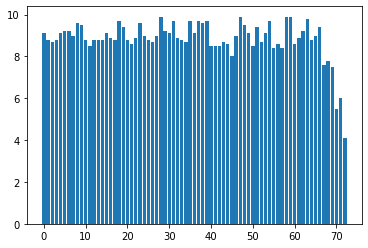

In [22]:
import matplotlib.pyplot as plt

plt.figure()

positions = [a for a in range(len(ratings))]
plt.bar(positions, ratings, align='center')
plt.show()

### Scraping Fast Track data

[Vir](https://towardsdatascience.com/data-science-skills-web-scraping-using-python-d1a85ef607ed)

Stran: https://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/

On the League Table webpage, a table containing 100 results is displayed. When inspecting the page it is easy to see a pattern in the html. The results are contained in rows within the table:

`<table class="tableSorter">`

In [23]:
# import libraries
from bs4 import BeautifulSoup
import requests
import csv

In [24]:
# specify the url
urlpage =  'http://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/'

In [28]:
# query the website and return the html to the variable 'page'
page = requests.get(urlpage)
# parse the html using beautiful soup and store in variable 'soup'
soup = BeautifulSoup(page.text, 'html.parser')

In [30]:
#print(soup)

In [34]:
# find results within table
table = soup.find('table', attrs={'class': 'tableSorter2'})
results = table.find_all('tr')
print('Number of results', len(results))

Number of results 101


In [35]:
results[0]

<tr>
<th>Rank</th>
<th>Company</th>
<th class="">Location</th>
<th class="no-word-wrap">Year end</th>
<th class="" style="text-align:right;">Annual sales rise over 3 years</th>
<th class="" style="text-align:right;">Latest sales £000s</th>
<th class="" style="text-align:right;">Staff</th>
<th class="">Comment</th>
<!--				<th>FYE</th>-->
</tr>

In [36]:
results[1]

<tr>
<td>1</td>
<td><a href="https://www.fasttrack.co.uk/company_profile/revolut-2/"><span class="company-name">Revolut</span></a>Digital banking services provider</td>
<td>East London</td>
<td>Dec 18</td>
<td style="text-align:right;">507.56%</td>
<td style="text-align:right;">*58,300</td>
<td style="text-align:right;">700</td>
<td>Valued at $1.7bn in 2018 and reported to be raising an additional $500m this year that could value it at $5bn</td>
<!--						<td>Dec 18</td>-->
</tr>

In [37]:
# create and write headers to a list 
rows = []

for row in results[0].find_all('th'):
    rows.append(row.contents[0])

In [38]:
print(rows)

['Rank', 'Company', 'Location', 'Year end', 'Annual sales rise over 3 years', 'Latest sales £000s', 'Staff', 'Comment']


In [39]:
# create and write headers to a list 
rows = []
rows.append(['Rank', 'Company Name', 'Webpage', 'Description', 'Location', 'Year end', 'Annual sales rise over 3 years', 'Sales £000s', 'Staff', 'Comments'])
print(rows)

[['Rank', 'Company Name', 'Webpage', 'Description', 'Location', 'Year end', 'Annual sales rise over 3 years', 'Sales £000s', 'Staff', 'Comments']]


The next step is to loop over the results, process the data and append to rows which can be written to a csv.

To find the results in the loop:



In [40]:
# loop over results
for result in results:
    # find all columns per result
    data = result.find_all('td')
    # check that columns have data 
    if len(data) == 0: 
        continue

In [41]:
data

[<td>100</td>,
 <td><a href="https://www.fasttrack.co.uk/company_profile/dianomi-5/"><span class="company-name">Dianomi</span></a>Financial marketing platform</td>,
 <td>Central London</td>,
 <td>Dec 18</td>,
 <td style="text-align:right;">49.21%</td>,
 <td style="text-align:right;">*14,615</td>,
 <td style="text-align:right;">27</td>,
 <td>Works with eight of the top 10 global asset managers</td>]

In [42]:
# write columns to variables
rank = data[0].getText()
company = data[1].getText()
location = data[2].getText()
yearend = data[3].getText()
salesrise = data[4].getText()
sales = data[5].getText()
staff = data[6].getText()
comments = data[7].getText()

In [43]:
rank

'100'

In [44]:
company

'DianomiFinancial marketing platform'

In [45]:
sales

'*14,615'

In [46]:
# extract description from the name
companyname = data[1].find('span', attrs={'class':'company-name'}).getText()

In [47]:
companyname

'Dianomi'

In [48]:
description = company.replace(companyname, '')

In [49]:
description

'Financial marketing platform'

In [50]:
# remove unwanted characters
sales = sales.strip('*').strip('†').replace(',','')

In [51]:
sales

'14615'

The last variable we would like to save is the company website. As discussed above, the second column contains a link to another page that has an overview of each company. Each company page has it’s own table, which most of the time contains the company website.

In [52]:
data[1]

<td><a href="https://www.fasttrack.co.uk/company_profile/dianomi-5/"><span class="company-name">Dianomi</span></a>Financial marketing platform</td>

Looking at a few of the company pages, as in the screenshot above, the urls are in last row in the table so we can search within the last row for the `<a>` element.

In [53]:
# go to link and extract company website
url = data[1].find('a').get('href')

In [54]:
url

'https://www.fasttrack.co.uk/company_profile/dianomi-5/'

In [55]:
page = requests.get(url)
# parse the html 
soup = BeautifulSoup(page.text, 'html.parser')

In [56]:
# find the last result in the table and get the link
try:
    tableRow = soup.find('table').find_all('tr')[-1]
    webpage = tableRow.find('a').get('href')
except:
    webpage = None

In [57]:
webpage

'http://www.dianomi.com'

You may want to save this data for analysis and this can be done very simply within python from our list.

In [58]:
# Create csv and write rows to output file
with open('techtrack100.csv','w', newline='') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(rows)

In [59]:
!cat techtrack100.csv

#### Celotni program skupaj

In [60]:
# import libraries
from bs4 import BeautifulSoup
import requests
import csv

# specify the url
urlpage =  'http://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/'

In [61]:
# query the website and return the html to the variable 'page'
page = requests.get(urlpage)
# parse the html using beautiful soup and store in variable 'soup'
soup = BeautifulSoup(page.text, 'html.parser')

In [63]:
# find results within table
table = soup.find('table', attrs={'class': 'tableSorter2'})
results = table.find_all('tr')
print('Number of results', len(results))

Number of results 101


In [64]:
# create and write headers to a list 
rows = []
rows.append(['Rank', 'Company Name', 'Webpage', 
             'Description', 'Location', 'Year end', 
             'Annual sales rise over 3 years', 'Sales £000s', 
             'Staff', 'Comments'])

In [69]:
#loop over results
for num, result in enumerate(results):
    # find all columns per result
    data = result.find_all('td')
    # check that columns have data 
    if len(data) == 0: 
        continue
        
    # write columns to variables
    rank = data[0].getText()
    company = data[1].getText()
    location = data[2].getText()
    yearend = data[3].getText()
    salesrise = data[4].getText()
    sales = data[5].getText()
    staff = data[6].getText()
    comments = data[7].getText() 
    
    #print('Company is', company)
    # Company is WonderblyPersonalised children's books
    # print('Sales', sales)
    # Sales *25,860

    # extract description from the name
    companyname = data[1].find('span', attrs={'class':'company-name'}).getText()    
    description = company.replace(companyname, '')
    print(num, '- Company is', companyname)
    
    # remove unwanted characters
    sales = sales.strip('*').strip('†').replace(',','')
    
    # go to link and extract company website
    url = data[1].find('a').get('href')
    page = requests.get(url)
    # parse the html using beautiful soup and store in variable 'soup'
    soup = BeautifulSoup(page.text, 'html.parser')
    # find the last result in the table and get the link
    try:
        tableRow = soup.find('table').find_all('tr')[-1]
        webpage = tableRow.find('a').get('href')
    except:
        webpage = None
    
    # write each result to rows
    rows.append([rank, companyname, webpage, description, location, yearend, salesrise, sales, staff, comments])

1 - Company is Revolut
2 - Company is Bizuma
3 - Company is Global-e
4 - Company is Jungle Creations
5 - Company is Oxford Nanopore Technologies
6 - Company is Lendable
7 - Company is Verve
8 - Company is Onfido
9 - Company is Reverse Media Group
10 - Company is Rebound Returns
11 - Company is ClearScore
12 - Company is SPOKE
13 - Company is FSB
14 - Company is Decibel
15 - Company is Miss Group
16 - Company is ComplyAdvantage
17 - Company is OTA Insight
18 - Company is Light Source
19 - Company is Digi2al
20 - Company is Perkbox
21 - Company is Lending Works
22 - Company is Faculty
23 - Company is Internet Mobile Communications
24 - Company is Fruugo
25 - Company is Featurespace
26 - Company is Monterosa
27 - Company is Lockwood Publishing
28 - Company is Plan.com
29 - Company is Capital on Tap
30 - Company is In Touch Networks
31 - Company is DV Signage
32 - Company is Ogury
33 - Company is Chameleon Technology
34 - Company is iwoca
35 - Company is Byte
36 - Company is Matillion
37 -

In [70]:
rows[1]

['1',
 'Revolut',
 'http://www.revolut.com',
 'Digital banking services provider',
 'East London',
 'Dec 18',
 '507.56%',
 '58300',
 '700',
 'Valued at $1.7bn in 2018 and reported to be raising an additional $500m this year that could value it at $5bn']

In [71]:
## Create csv and write rows to output file
with open('OUT_techtrack100.csv','w', newline='') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(rows)

In [72]:
df = pd.read_csv('OUT_techtrack100.csv')

In [73]:
df.head()

,Rank,Company Name,Webpage,Description,Location,Year end,Annual sales rise over 3 years,Sales £000s,Staff,Comments
0,1,Revolut,http://www.revolut.com,Digital banking services provider,East London,Dec 18,507.56%,58300,700,Valued at $1.7bn in 2018 and reported to be ra...
1,2,Bizuma,http://www.bizuma.com,B2B e-commerce platform,Central London,Mar 19,315.18%,26414,114,Connects wholesale buyers and sellers from ove...
2,3,Global-e,http://www.global-e.com,Cross-border ecommerce solutions,Central London,Dec 18,303.09%,29297,28,Its technology helps ecommerce retailers local...
3,4,Jungle Creations,http://www.junglecreations.com,Social media & ecommerce services,East London,Dec 18,302.53%,15972,159,Launched the first-ever delivery-only restaura...
4,5,Oxford Nanopore Technologies,http://www.nanoporetech.com,DNA analysis technology,Oxford,Dec 18,251.87%,32500,439,Has raised £451m in funding and was valued at ...
